# Part I - Ford GoBike System Data - Exploration
## by Ikechukwu Ogbuchi

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Loading data
bikedata=pd.read_csv("201902-fordgobike-tripdata.csv") 
bikedata.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Exploring information about the data
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
#exploring data shape
bikedata.shape

(183412, 16)

In [5]:
#describing properties of data
bikedata.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#looking at all columns
bikedata.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
#looking at datatype of each
bikedata.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
bikedata.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
bikedata.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
19968,870,2019-02-26 14:38:26.9960,2019-02-26 14:52:57.9200,60.0,8th St at Ringold St,37.774520,-122.409449,133.0,Valencia St at 22nd St,37.755213,-122.420975,4458,Subscriber,1994.0,Male,No
110291,597,2019-02-12 18:04:30.4310,2019-02-12 18:14:27.9460,60.0,8th St at Ringold St,37.774520,-122.409449,27.0,Beale St at Harrison St,37.788059,-122.391865,4432,Subscriber,1993.0,Male,No
22228,568,2019-02-26 08:20:53.1330,2019-02-26 08:30:21.7690,58.0,Market St at 10th St,37.776619,-122.417385,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2628,Subscriber,NaN,NaN,No
22568,294,2019-02-26 07:46:05.0350,2019-02-26 07:50:59.5130,106.0,Sanchez St at 17th St,37.763242,-122.430675,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5909,Subscriber,1986.0,Male,No
14534,479,2019-02-27 12:03:00.1140,2019-02-27 12:10:59.9210,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,61.0,Howard St at 8th St,37.776513,-122.411306,5971,Subscriber,NaN,NaN,No


### What is the structure of your dataset?

> My dataset has 183,412 rows with 16 columns. It consists of integer, float and string object datatypes. The member_birth_year column and the member_gender columns have the most missing values. And some of the columns have incorrect data types like the start_time, end_time and bike_id columns. 

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in this dataset would be user_type, duration_second, start_time, end_time, bike_id and the bike_share_for_all_trip column. 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that I think will support my investigation include:  the start_time and end_time columns would be relevant. and the bike_share_for_all_trip column, user_type and duration_seconds

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Wrangling and Edits before Exploration

In [10]:
#Before Univariate exploration, I drop all row with missing values and use the remaining
bikedata.dropna(axis=0,inplace=True)


In [11]:
#confirming
bikedata.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
bikedata.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [13]:
#correcting datatypes of time and id to datetime
#correcting bike_id to str
bikedata['start_time'] = pd.to_datetime(bikedata['start_time'])
bikedata['end_time'] = pd.to_datetime(bikedata['end_time'])
bikedata['bike_id'] = bikedata['bike_id'].astype(str)


In [14]:
#checking all corrected
print(bikedata['end_time'].dtypes)
print(bikedata['bike_id'].dtypes)

datetime64[ns]
object


In [15]:
#previewing 
bikedata.tail(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [16]:
#creating an age column for all users
bikedata['member_age'] = 2022 - bikedata.member_birth_year  
bikedata['member_age'] = bikedata['member_age'].astype(int)


In [17]:
#creating columns that show start hour, start day, end hour and end day
bikedata['start_day']= bikedata['start_time'].dt.dayofweek
bikedata['start_hour']= bikedata['start_time'].dt.hour
bikedata['end_day']= bikedata['end_time'].dt.dayofweek
bikedata['end_hour']= bikedata['end_time'].dt.hour

In [18]:
#creating columns that show day of the week in String
#creating mapping key first
mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
bikedata['start_day_name']=bikedata['start_day'].map(mapping)
bikedata['end_day_name']=bikedata['end_day'].map(mapping)



In [19]:
#previewing new columns created 
bikedata.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_day,start_hour,end_day,end_hour,start_day_name,end_day_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,38,3,17,4,8,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,50,3,12,4,5,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,33,3,17,4,4,Thursday,Friday


In [20]:
#creating a new columns to show duration in minutes and duration in hours using floor division
bikedata['duration_min']=bikedata['duration_sec']//60
bikedata['duration_hr']=bikedata['duration_sec']//3600

In [21]:
#previewing 
bikedata.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_day,start_hour,end_day,end_hour,start_day_name,end_day_name,duration_min,duration_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,38,3,17,4,8,Thursday,Friday,869,14


### Univariate explorations begin here

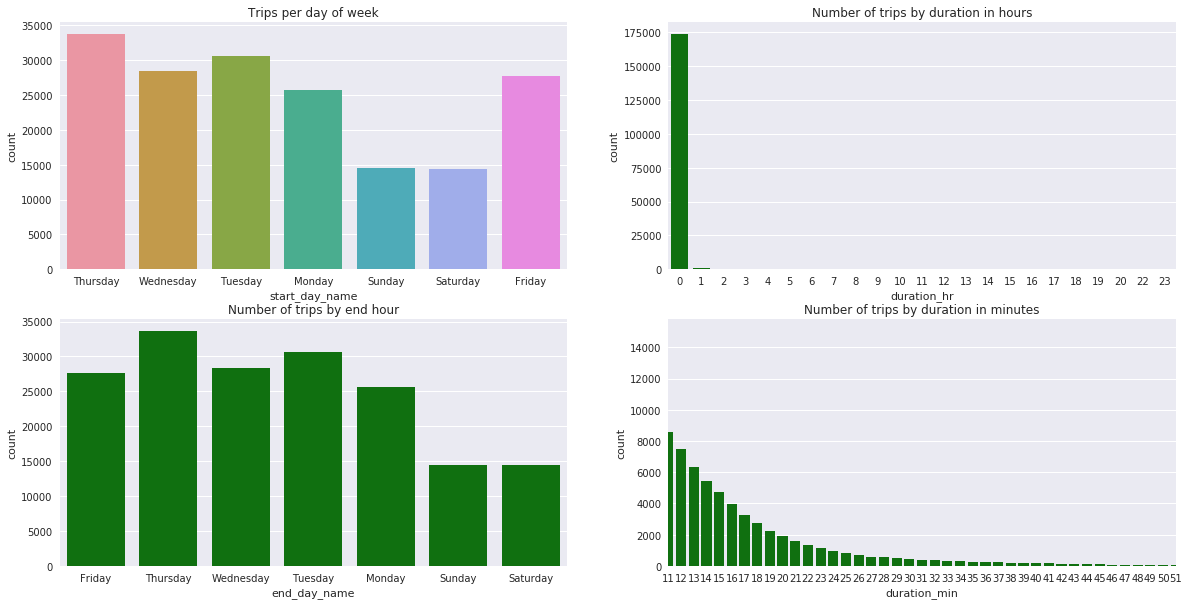

In [22]:
#plotting the days of the week in a plot
plt.figure(figsize = [20, 10])
base_color='green'
    
plt.subplot(2, 2, 1)
sb.countplot(data= bikedata , x='start_day_name')
plt.title('Trips per day of week')


plt.subplot(2, 2, 2)
sb.countplot(data= bikedata , x='duration_hr' , color=base_color)
plt.title('Number of trips by duration in hours')

plt.subplot(2, 2, 3)
sb.countplot(data= bikedata , x='end_day_name' , color=base_color)
plt.title('Number of trips by end hour')

plt.subplot(2, 2, 4)
sb.countplot(data= bikedata , x='duration_min' , color=base_color)
plt.xlim((10,50))
plt.title('Number of trips by duration in minutes');

In [23]:
bikedata.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_day', 'start_hour', 'end_day', 'end_hour',
       'start_day_name', 'end_day_name', 'duration_min', 'duration_hr'],
      dtype='object')

Text(0,0.5,'Frequency')

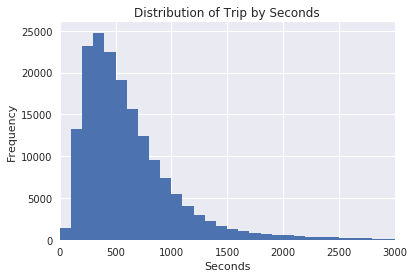

In [24]:
#plotting duration by seconds
bins_arange = np.arange(0, bikedata['duration_sec'].max() + 100 , 100)
plt.hist(data = bikedata , x = 'duration_sec' , bins = bins_arange)
plt.xlim(0,3000)
plt.title('Distribution of Trip by Seconds')
plt.xlabel('Seconds')
plt.ylabel('Frequency')


In [25]:
user_counts=bikedata["user_type"].value_counts()

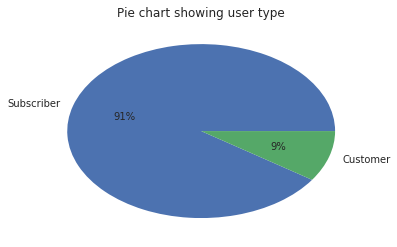

In [26]:
#plotting subscriber or customer 

plt.pie(user_counts, labels = user_counts.index, autopct='%.0f%%')
plt.title('Pie chart showing user type')
plt.show()

Text(0.5,1,'Gender count exploration')

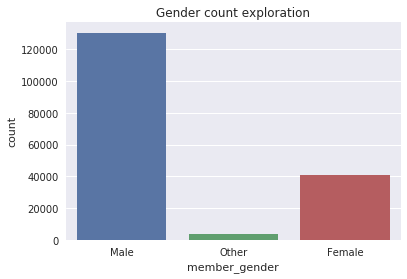

In [27]:
#Plotting Gender category
sb.countplot(data=bikedata, x='member_gender')
plt.title('Gender count exploration')

In [28]:
top_10_stations=bikedata['start_station_name'].value_counts()[ :12]

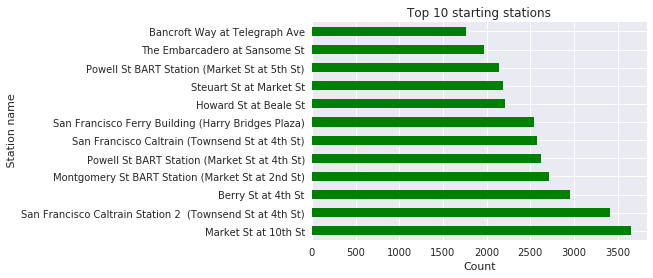

In [29]:
#plotting top 10 stations 
top_10_stations.plot(kind = 'barh', color='green')
plt.title('Top 10 starting stations')
plt.xlabel('Count')
plt.ylabel(' Station name');

Q.1 What gender took the most bike trips? Male

Q. 2 What category of user types had the most bike trips?  The Subscribers

Q. 3. What is the most famous station for bike users?

1. When are most trips taken in terms of time of day, day of the week, or month of the year?


2. How long does the average trip take?


3. Does the above depend on if a user is a subscriber or customer?

### Bivariate explorations begin here

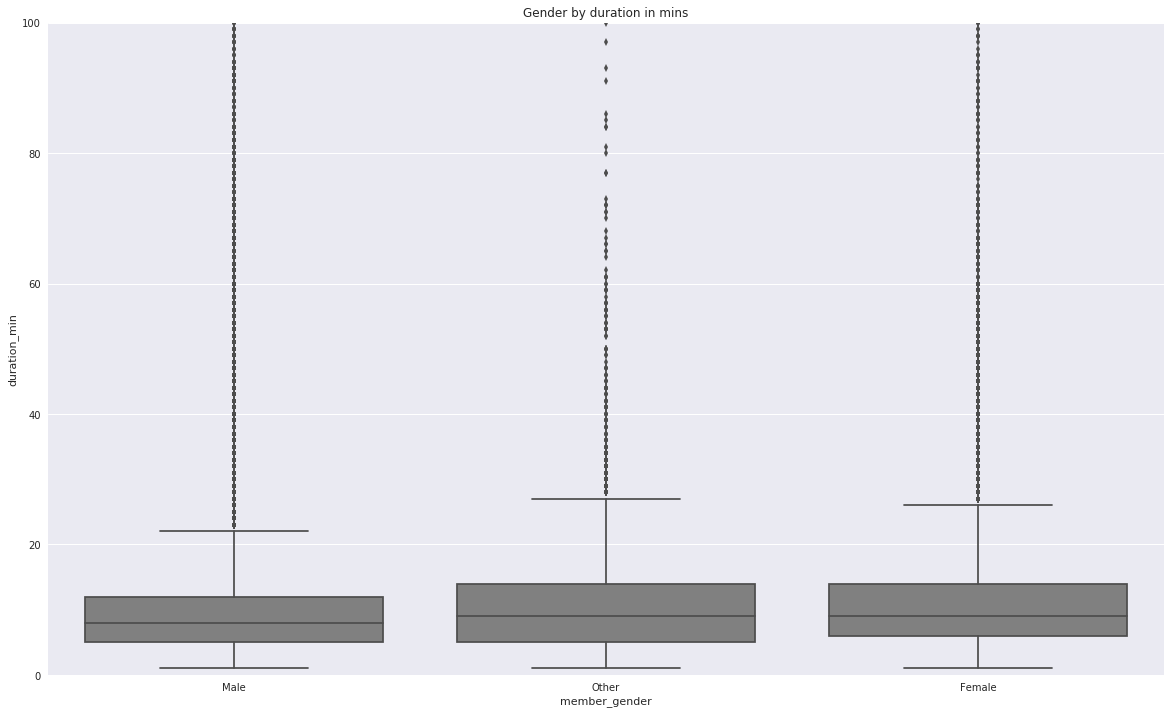

In [30]:
#creating box plot showing trip duration by gender
 
plt.figure(figsize = [20, 12])
plt.ylim(0,100)
base_color = 'grey'
sb.boxplot(data=bikedata , x='member_gender' , y='duration_min' , color=base_color)
plt.title('Gender by duration in mins') ;

##### The duration of bike ride duration is fairly the same across all gender groups

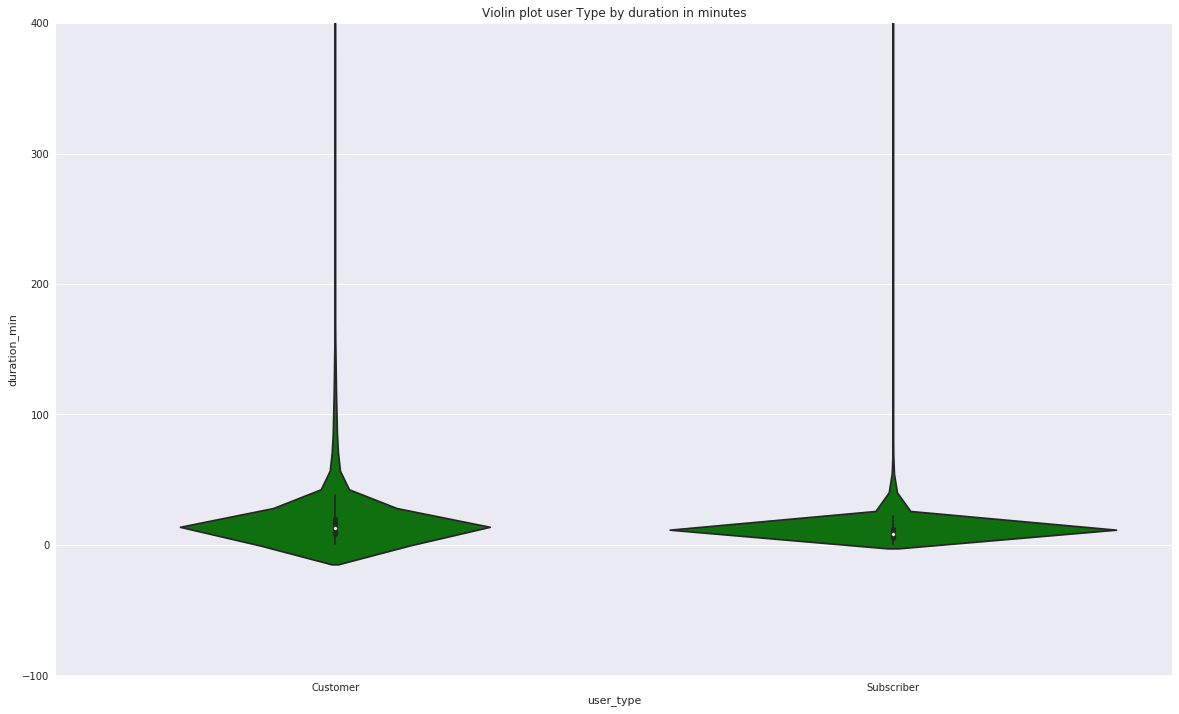

In [31]:
#violin plot showing user type by duration in minutes 


plt.figure(figsize = [20, 12])
plt.ylim(-100,400)
base_color = 'green'
sb.violinplot(data = bikedata, x='user_type', y='duration_min', color= base_color)
plt.title('Violin plot user Type by duration in minutes');

#### from the violin plot, customer and subscribers have similar durations with mean customer duration slightly higher than subscriber

Text(0.5,1,'Point plot of age against duration in minutes')

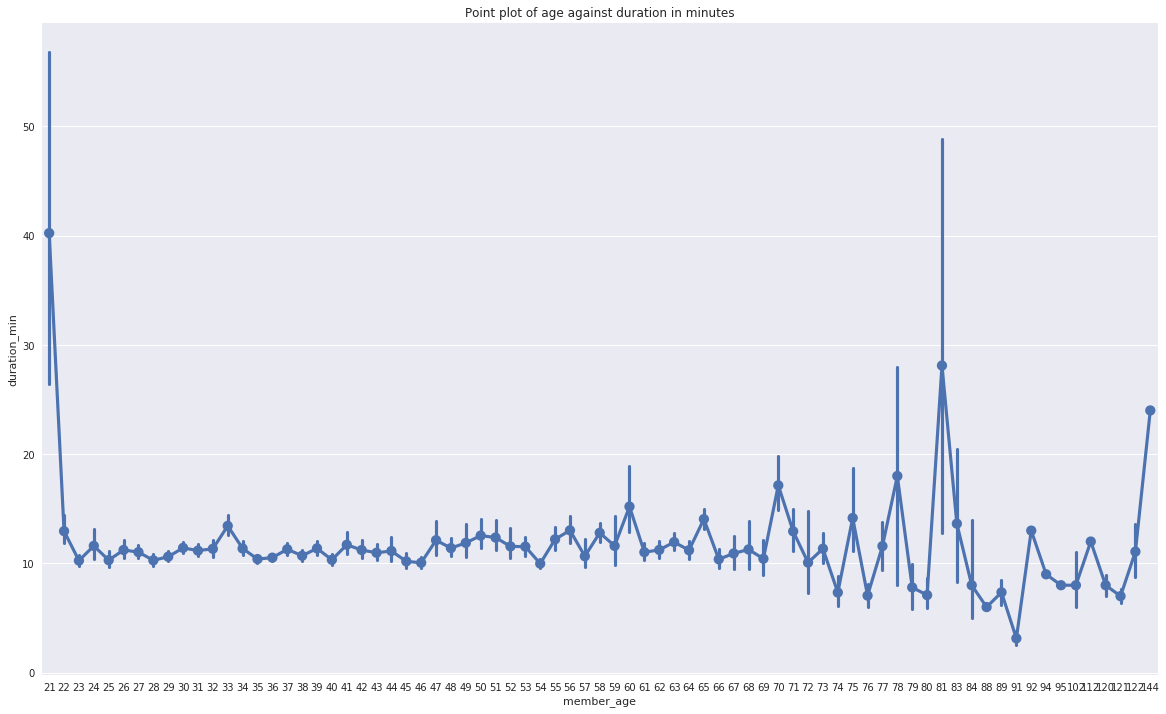

In [32]:
#checking if Age and trip duration in minutes
plt.figure(figsize = [20, 12])
sb.pointplot(data=bikedata, x="member_age",y='duration_min')
plt.title('Point plot of age against duration in minutes')

#### The lineblot shows that the users aged 21 recorded the highest duration of bike rides.

Text(0.5,1,'customer count by Day of the week')

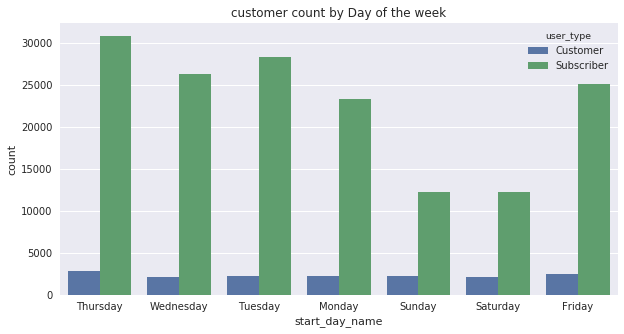

In [33]:
#comparing customer and subscriber count for each day of week
plt.figure(figsize = [10, 5])
sb.countplot(data= bikedata , x='start_day_name',hue="user_type")
plt.title('customer count by Day of the week')

### Multivariate Explorations Begins here

Text(0.5,1,'duration in minutes by gender and customer type')

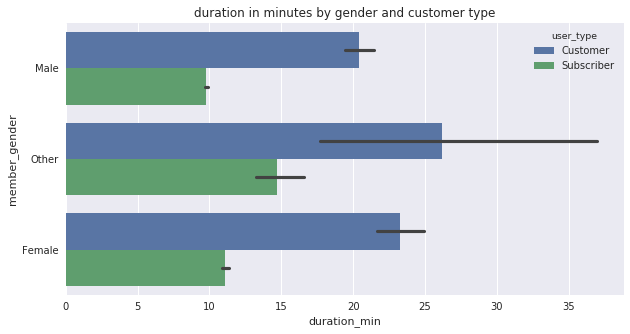

In [34]:
#duration in minutes by ender and customer type

plt.figure(figsize = [10, 5])
sb.barplot(data= bikedata , x='duration_min',y="member_gender", hue="user_type")
plt.title('duration in minutes by gender and customer type')

Text(0.5,1,'duration in minutes by gender and customer type')

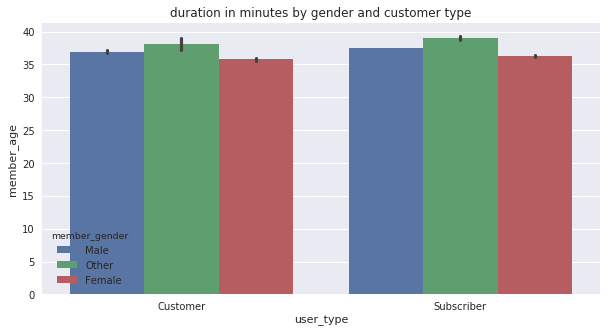

In [35]:
plt.figure(figsize = [10, 5])
sb.barplot(data= bikedata , y='member_age',x="user_type", hue="member_gender")
plt.title('duration in minutes by gender and customer type')

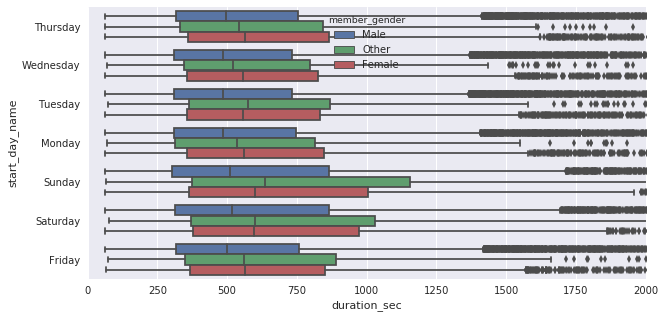

In [36]:
plt.figure(figsize = [10, 5])
plt.xlim(0,2000)
sb.boxplot(data= bikedata , y='start_day_name',x="duration_sec", hue="member_gender")

In [37]:
#

Text(0.5,1,'Correlation of different variables')

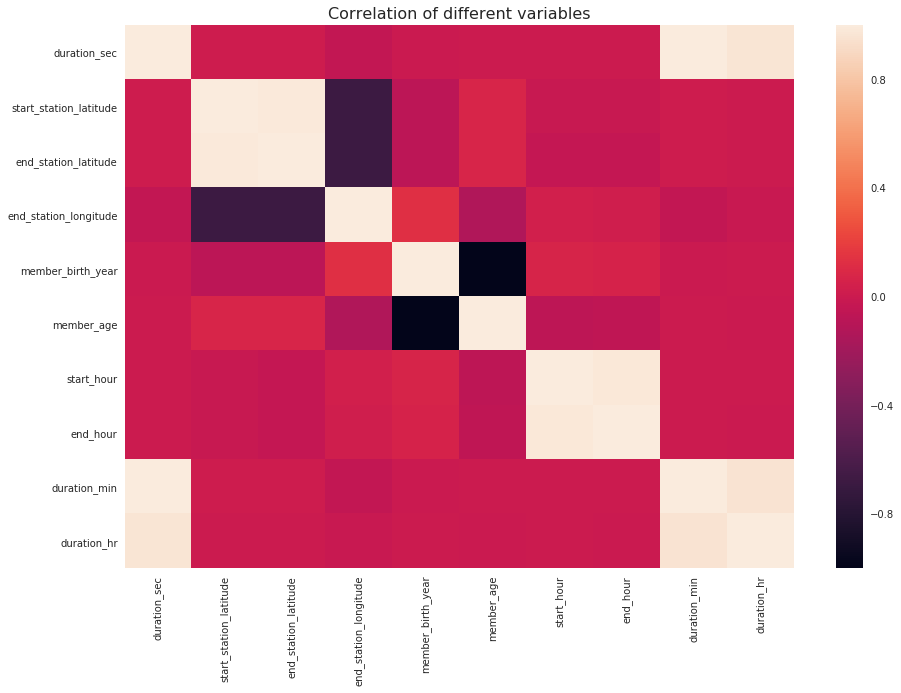

In [38]:
#correlation plot of different variables 
xcorr=bikedata[['duration_sec','start_station_latitude',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'member_birth_year', 'bike_share_for_all_trip',
       'member_age', 'start_hour', 'end_hour','duration_min', 'duration_hr']]
plt.figure(figsize = [15, 10])
sb.heatmap(xcorr.corr('pearson'))
plt.title("Correlation of different variables",fontdict={'fontsize': 16})

In [39]:
bikedata.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_day', 'start_hour', 'end_day', 'end_hour',
       'start_day_name', 'end_day_name', 'duration_min', 'duration_hr'],
      dtype='object')

# Findings

1. Majority of the trips started on Thursday
2. Most of the trips are less than 1 hour in duratio
3. Over 90 percent of bike trips were by subscribers rather than customers
4. The customer and subscriber user types spent about same duration on rides
5. There are more males than females combined with 'other' category

In [40]:
#Exporting cleaned bike data for slides part
bikedata.to_csv("wrangled_bike_data.csv")



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.